# Portafolio Finanzas

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
from pulp import *

In [ ]:
activos = ["AAPL", "MSFT","AMZN","GOOGL","FB","TSLA","V","^IXIC"]

In [ ]:
fechaInicio = "2016-04-20"
hoy = datetime.today().strftime('%Y-%m-%d')

In [ ]:
df_precios = pd.DataFrame()

In [ ]:
def datosYahoo(dataframe,nombresActivos,inicio,fin):
    for i in nombresActivos:
        dataframe[i] = data.DataReader(i,data_source='yahoo',start=inicio , end=fin)["Adj Close"]
    return dataframe
df = datosYahoo(df_precios,activos,fechaInicio,hoy)
df

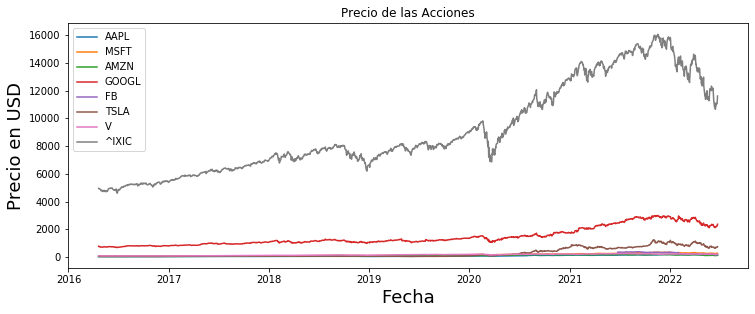

In [54]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
#df = df.dropna()

In [56]:
df = np.log(df).diff()
df = df.dropna()
df

,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V,^IXIC
Date,,,,,,,,
2021-06-28,0.012468,0.013864,0.012397,0.000224,0.040952,0.024770,-0.013704,0.009710
2021-06-29,0.011434,0.009924,0.001233,-0.002153,-0.010600,-0.011625,0.007914,0.001917
2021-06-30,0.004611,-0.001844,-0.002317,-0.001498,-0.011950,-0.001558,-0.009068,-0.001680
2021-07-01,0.002261,0.002581,-0.002092,0.002903,0.019029,-0.002622,0.005672,0.001270
2021-07-02,0.019407,0.022031,0.022469,0.022714,0.000874,0.001445,0.014691,0.008021
...,...,...,...,...,...,...,...,...
2022-06-17,0.011467,0.010881,0.024396,0.010414,0.017683,0.017029,0.005065,0.014200
2022-06-21,0.032236,0.024294,0.022895,0.040250,-0.041716,0.089424,0.022790,0.024782
2022-06-22,-0.003834,-0.002407,0.002481,-0.000507,-0.007670,-0.004016,-0.002937,-0.001466


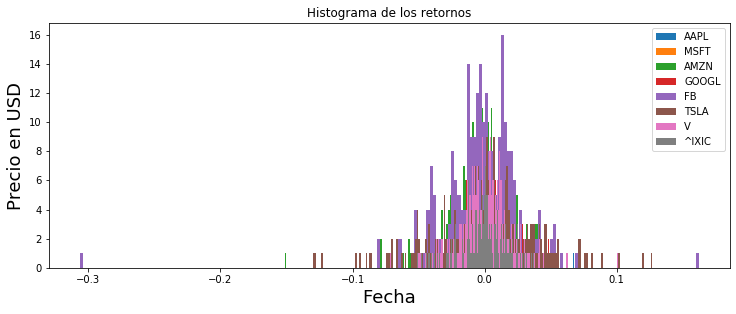

In [57]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
#Separamos el Benchmark del resto de los activos creando una nueva base de datos.
df_activos =  df.loc[:, df.columns != '^IXIC']
df_activos

,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V
Date,,,,,,,
2021-06-28,0.012468,0.013864,0.012397,0.000224,0.040952,0.024770,-0.013704
2021-06-29,0.011434,0.009924,0.001233,-0.002153,-0.010600,-0.011625,0.007914
2021-06-30,0.004611,-0.001844,-0.002317,-0.001498,-0.011950,-0.001558,-0.009068
2021-07-01,0.002261,0.002581,-0.002092,0.002903,0.019029,-0.002622,0.005672
2021-07-02,0.019407,0.022031,0.022469,0.022714,0.000874,0.001445,0.014691
...,...,...,...,...,...,...,...
2022-06-17,0.011467,0.010881,0.024396,0.010414,0.017683,0.017029,0.005065
2022-06-21,0.032236,0.024294,0.022895,0.040250,-0.041716,0.089424,0.022790
2022-06-22,-0.003834,-0.002407,0.002481,-0.000507,-0.007670,-0.004016,-0.002937


In [59]:
df_benchmark1 =  df.loc[:, df.columns == '^IXIC']

In [60]:
retornos1 = expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.07/100, frequency=252)
retornos1

NameError: name 'expected_returns' is not defined

In [61]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [62]:
df_cov = df_activos.cov()*252
df_cov

,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V
AAPL,0.088677,0.066224,0.079990,0.066716,0.085236,0.109582,0.052919
MSFT,0.066224,0.081343,0.078826,0.069734,0.088808,0.096937,0.050196
AMZN,0.079990,0.078826,0.170810,0.085172,0.128493,0.124385,0.058755
GOOGL,0.066716,0.069734,0.085172,0.093849,0.103402,0.097944,0.049890
FB,0.085236,0.088808,0.128493,0.103402,0.283864,0.129238,0.071644
TSLA,0.109582,0.096937,0.124385,0.097944,0.129238,0.379357,0.067399
V,0.052919,0.050196,0.058755,0.049890,0.071644,0.067399,0.096177


In [63]:
#Varianza del Portafolio
varianza_portafolio = pesos.T @ df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 9.6%'

In [64]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'La volatilidad del portafolio es: 31.0%'

In [65]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

NameError: name 'retornos1' is not defined

In [66]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

NameError: name 'EfficientFrontier' is not defined

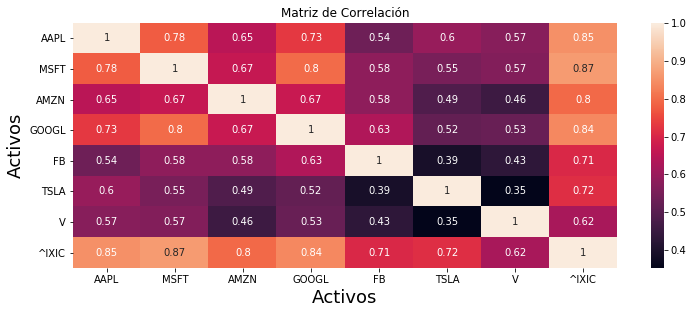

In [67]:
correlation_mat = df.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()

In [68]:
import numpy as np
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

ticker = 'GOOG'
start = datetime.strptime('2018-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-03-10', '%Y-%m-%d')

historical_data = pdr.DataReader(ticker, start, end , data_source='yahoo')

alpha = 0.01
num_shares = 5000
on_date = '2021-03-09'
share_price = historical_data['Adj Close'][on_date]

# No assumption involved use the theoretical distribution
daily_return_rates = historical_data['Adj Close'].pct_change().dropna().sort_values().reset_index(drop=True)
xth = int(np.floor(0.01*len(daily_return_rates))) - 1
xth_smallest_rate = daily_return_rates[xth]

mean_return_rate = daily_return_rates.mean()

rel_VaR = num_shares * share_price * (mean_return_rate - xth_smallest_rate)
abs_VaR = -num_shares * share_price * xth_smallest_rate

print("The estimated relative VaR and absolute VaR of an investment of", num_shares, "shares of", ticker, "on", on_date, "with price $", round(share_price,2), "per share is $", round(rel_VaR,2), "and $", round(abs_VaR,2), "respectively.")


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\yerko\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\yerko\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\yerko\Anaconda3\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\yerko\Anaconda3\lib\site-packages\yfinance\multi.py", line 190, in _download_one_threaded
    timeout)
  File "C:\Users\yerko\Anaconda3\lib\site-packages\yfinance\multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "C:\Users\yerko\Anaconda3\lib\site-packages\yfinance\base.py", line 75, in __init__
    "yearly": utils.empty_df(),
  File "C:\Users\yerko\Anaconda3\lib\site-packages\yfinance\utils.py", line 87, in empty_df
    'Close': _np.nan, 'Adj Close': _np.nan, 'Volume': _np.nan})
  File "C:\Users\y

KeyboardInterrupt: 

In [ ]:
import numpy as np
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

import scipy.stats as stats

yf.pdr_override()

ticker = 'GOOG'
start = datetime.strptime('2018-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-03-10', '%Y-%m-%d')

historical_data = pdr.DataReader(ticker, start, end , data_source='yahoo')

alpha = 0.01
num_shares = 5000
on_date = '2021-03-09'
share_price = historical_data['Adj Close'][on_date]

# Use z value, mean and standard deviation to calculation
# Assume return is normal distribution
Z_value = stats.norm.ppf(abs(alpha))
mean_return_rate = historical_data['Adj Close'].pct_change().mean()
std_return_rate = historical_data['Adj Close'].pct_change().std()

rel_VaR = -num_shares * share_price * Z_value * std_return_rate 
abs_VaR = -num_shares * share_price * (Z_value * std_return_rate + mean_return_rate)

print("The estimated relative VaR and absolute VaR of an investment of", num_shares, "shares of", ticker, "on", on_date, "with price $", round(share_price,2), "per share is $", round(rel_VaR,2), "and $", round(abs_VaR,2), "respectively.")


In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close          Close           High            Low      \
Symbols          TSLA  FB       TSLA  FB       TSLA  FB       TSLA  FB   
Date                                                                     
2018-01-02  64.106003 NaN  64.106003 NaN  64.421997 NaN  62.200001 NaN   
2018-01-03  63.450001 NaN  63.450001 NaN  65.050003 NaN  63.110001 NaN   
2018-01-04  62.924000 NaN  62.924000 NaN  63.709999 NaN  61.136002 NaN   
2018-01-05  63.316002 NaN  63.316002 NaN  63.448002 NaN  62.400002 NaN   
2018-01-08  67.281998 NaN  67.281998 NaN  67.403999 NaN  63.099998 NaN   

Attributes       Open          Volume      
Symbols          TSLA  FB        TSLA  FB  
Date                                       
2018-01-02  62.400002 NaN  21761000.0 NaN  
2018-01-03  64.199997 NaN  22607500.0 NaN  
2018-01-04  62.574001 NaN  49731500.0 NaN  
2018-01-05  63.324001 NaN  22956000.0 NaN  
2018-01-08  63.200001 NaN  49297000.0 NaN

In [3]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                      Close             \
Symbols          AAPL        NKE       GOOGL     AMZN       AAPL        NKE   
Date                                                                          
2015-01-02  24.678249  43.896652  529.549988  15.4260  27.332500  47.514999   
2015-01-05  23.983025  43.189903  519.460022  15.1095  26.562500  46.750000   
2015-01-06  23.985289  42.935848  506.640015  14.7645  26.565001  46.474998   
2015-01-07  24.321608  43.822739  505.149994  14.9210  26.937500  47.435001   
2015-01-08  25.256104  44.834362  506.910004  15.0230  27.972500  48.529999   

Attributes                            High             ...         Low  \
Symbols          GOOGL     AMZN       AAPL        NKE  ...       GOOGL   
Date                                                   ...               
2015-01-02  529.549988  15.4260  27.860001  48.474998  ...  527.880005   
2015-01-05  519.460022  15.1095  27.162500  47.275002  ...  517.750000   
2015-01-06  506.640015  14.7645  26.857500  47.075001  ...  505.549988   
2015-01-07  505.149994  14.9210  27.049999  47.650002  ...  503.649994   
2015-01-08  506.910004  15.0230  28.037500  48.549999  ...  495.019989   

Attributes                Open                                       Volume  \
Symbols        AMZN       AAPL        NKE       GOOGL     AMZN         AAPL   
Date                                                                          
2015-01-02  15.3480  27.847500  48.275002  532.599976  15.6290  212818400.0   
2015-01-05  15.0425  27.072500  47.255001  527.150024  15.3505  257142000.0   
2015-01-06  14.6190  26.635000  46.945000  520.500000  15.1120  263188400.0   
2015-01-07  14.7665  26.799999  46.805000  510.950012  14.8750  160423600.0   
2015-01-08  14.8055  27.307501  47.830002  501.510010  15.0160  237458000.0   

Attributes                                    
Symbols           NKE      GOOGL        AMZN  
Date                                          
2015-01-02  4985800.0  1324000.0  55664000.0  
2015-01-05  6889200.0  2059100.0  55484000.0  
2015-01-06  7576000.0  2722800.0  70380000.0  
2015-01-07  7256000.0  2345900.0  52806000.0  
2015-01-08  5978200.0  3652700.0  61768000.0  

[5 rows x 24 columns]

In [4]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,NaN
2018-01-03,63.450001,NaN
2018-01-04,62.924000,NaN
2018-01-05,63.316002,NaN
2018-01-08,67.281998,NaN


In [5]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [6]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0007641199185692106

In [7]:
# Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
Name: FB, dtype: float64

In [8]:
# Variance
var_fb = fb.var()
var_fb

0.0011264458360611303

In [9]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.4370697651889257, 0.5306707632942318)

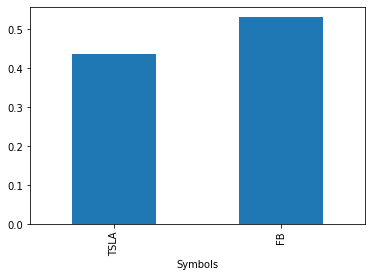

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,NaN
2018-01-04,-0.008325,NaN
2018-01-05,0.006210,NaN
2018-01-08,0.060755,NaN


In [12]:
# Covariance
test1['TSLA'].cov(test1['FB'])

0.0

In [13]:
test1['TSLA'].corr(test1['FB'])

nan

In [14]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,NaN
2018-01-04,-0.008325,NaN
2018-01-05,0.006210,NaN
2018-01-08,0.060755,NaN


In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000353
FB     -0.002774
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

-0.002148417320640553

In [17]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                      Close             \
Symbols          AAPL        NKE       GOOGL     AMZN       AAPL        NKE   
Date                                                                          
2015-01-02  24.678249  43.896645  529.549988  15.4260  27.332500  47.514999   
2015-01-05  23.983025  43.189911  519.460022  15.1095  26.562500  46.750000   
2015-01-06  23.985283  42.935848  506.640015  14.7645  26.565001  46.474998   
2015-01-07  24.321611  43.822739  505.149994  14.9210  26.937500  47.435001   
2015-01-08  25.256096  44.834354  506.910004  15.0230  27.972500  48.529999   

Attributes                            High             ...         Low  \
Symbols          GOOGL     AMZN       AAPL        NKE  ...       GOOGL   
Date                                                   ...               
2015-01-02  529.549988  15.4260  27.860001  48.474998  ...  527.880005   
2015-01-05  519.460022  15.1095  27.162500  47.275002  ...  517.750000   
2015-01-06  506.640015  14.7645  26.857500  47.075001  ...  505.549988   
2015-01-07  505.149994  14.9210  27.049999  47.650002  ...  503.649994   
2015-01-08  506.910004  15.0230  28.037500  48.549999  ...  495.019989   

Attributes                Open                                       Volume  \
Symbols        AMZN       AAPL        NKE       GOOGL     AMZN         AAPL   
Date                                                                          
2015-01-02  15.3480  27.847500  48.275002  532.599976  15.6290  212818400.0   
2015-01-05  15.0425  27.072500  47.255001  527.150024  15.3505  257142000.0   
2015-01-06  14.6190  26.635000  46.945000  520.500000  15.1120  263188400.0   
2015-01-07  14.7665  26.799999  46.805000  510.950012  14.8750  160423600.0   
2015-01-08  14.8055  27.307501  47.830002  501.510010  15.0160  237458000.0   

Attributes                                    
Symbols           NKE      GOOGL        AMZN  
Date                                          
2015-01-02  4985800.0  1324000.0  55664000.0  
2015-01-05  6889200.0  2059100.0  55484000.0  
2015-01-06  7576000.0  2722800.0  70380000.0  
2015-01-07  7256000.0  2345900.0  52806000.0  
2015-01-08  5978200.0  3652700.0  61768000.0  

[5 rows x 24 columns]

In [18]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.678249,43.896645,529.549988,15.4260
2015-01-05,23.983025,43.189911,519.460022,15.1095
2015-01-06,23.985283,42.935848,506.640015,14.7645
2015-01-07,24.321611,43.822739,505.149994,14.9210
2015-01-08,25.256096,44.834354,506.910004,15.0230


In [19]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [20]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360910,0.524818,0.496611
NKE,0.360910,1.000000,0.387435,0.341530
GOOGL,0.524818,0.387435,1.000000,0.647942
AMZN,0.496611,0.341530,0.647942,1.000000


In [21]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079363987101157

In [22]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [23]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20549015351878105

In [24]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [25]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


In [26]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [28]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [29]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [30]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

ValueError: arrays must all be same length

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])